In [15]:
import pandas as pd
from tensorflow import keras
train_df = pd.read_csv('train_2.csv', header=None)
test_df = pd.read_csv('test_2.csv', header=None)

train_df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,201,113,0.898348,205,114,0.861246,202,111,0.761908,207,...,115,127,0.795614,78,127,0.749172,83,128,0.599454,0
1,0,0,0.100505,0,0,0.063133,0,0,0.016443,0,...,110,177,0.512621,0,0,0.286854,0,0,0.198678,0
2,0,0,0.495842,0,0,0.373432,0,0,0.385098,0,...,127,132,0.905083,136,126,0.854407,139,128,0.865832,0
3,0,0,0.084439,0,0,0.043338,0,0,0.076579,0,...,152,132,0.940035,176,127,0.925004,177,127,0.937462,0
4,200,120,0.742601,202,120,0.815840,0,0,0.386188,209,...,140,125,0.975780,96,129,0.984664,98,128,0.974312,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,133,90,0.981998,136,88,0.962581,131,88,0.928683,140,...,133,159,0.982718,139,187,0.916334,135,185,0.906381,4
2491,129,92,0.965659,130,90,0.947477,127,91,0.796640,136,...,133,156,0.989256,142,180,0.963923,134,178,0.946711,4
2492,122,95,0.947770,123,92,0.937974,121,93,0.674567,128,...,131,155,0.979138,144,183,0.950410,132,178,0.908395,4
2493,132,88,0.928288,134,86,0.953539,0,0,0.487560,140,...,141,160,0.968341,151,188,0.959536,143,186,0.889277,4


In [16]:
column_index = 32  # Change this to the actual index of the column
threshold_value = 0.5

train_df = train_df[train_df.iloc[:, column_index] >= threshold_value]

column_index = 35
train_df = train_df[train_df.iloc[:, column_index] >= threshold_value]


In [17]:
column_index = 32  # Change this to the actual index of the column
threshold_value = 0.5

test_df = test_df[test_df.iloc[:, column_index] >= threshold_value]

column_index = 35
test_df = test_df[test_df.iloc[:, column_index] >= threshold_value]


In [18]:

class_names = ['1',2,3,4,5]
y = train_df.pop(51).values
y = keras.utils.to_categorical(y)

X = train_df.values

In [19]:
from sklearn.model_selection import train_test_split



X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.15)

In [20]:
import tensorflow as tf
from utils import landmarks_to_embedding

inputs = tf.keras.Input(shape=(51))
embedding = landmarks_to_embedding(inputs)
layer = keras.layers.Dense(128, activation=tf.nn.relu6)(embedding)
layer = keras.layers.Dropout(0.5)(layer)
layer = keras.layers.Dense(64, activation=tf.nn.relu6)(layer)
layer = keras.layers.Dropout(0.5)(layer)
outputs = keras.layers.Dense(len(class_names), activation="softmax")(layer)
model = keras.Model(inputs, outputs)

In [21]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add a checkpoint callback to store the checkpoint that has the highest
# validation accuracy.
checkpoint_path = "weights.best_1.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                              patience=20)

# Start training
history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, earlystopping])

Epoch 1/200
121/122 [============================>.] - ETA: 0s - loss: 1.5198 - accuracy: 0.3218
Epoch 1: val_accuracy improved from -inf to 0.40351, saving model to weights.best_1.hdf5
122/122 [==============================] - 4s 11ms/step - loss: 1.5193 - accuracy: 0.3225 - val_loss: 1.4192 - val_accuracy: 0.4035
Epoch 2/200
  1/122 [..............................] - ETA: 0s - loss: 1.6528 - accuracy: 0.3125

c:\Users\mhasaan\AppData\Local\miniconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


120/122 [============================>.] - ETA: 0s - loss: 1.3628 - accuracy: 0.4266
Epoch 2: val_accuracy improved from 0.40351 to 0.45614, saving model to weights.best_1.hdf5
122/122 [==============================] - 1s 5ms/step - loss: 1.3619 - accuracy: 0.4272 - val_loss: 1.2312 - val_accuracy: 0.4561
Epoch 3/200
120/122 [============================>.] - ETA: 0s - loss: 1.2198 - accuracy: 0.4854
Epoch 3: val_accuracy improved from 0.45614 to 0.52339, saving model to weights.best_1.hdf5
122/122 [==============================] - 1s 6ms/step - loss: 1.2195 - accuracy: 0.4856 - val_loss: 1.0932 - val_accuracy: 0.5234
Epoch 4/200
117/122 [===========================>..] - ETA: 0s - loss: 1.1397 - accuracy: 0.5053
Epoch 4: val_accuracy improved from 0.52339 to 0.55848, saving model to weights.best_1.hdf5
122/122 [==============================] - 1s 5ms/step - loss: 1.1389 - accuracy: 0.5077 - val_loss: 1.0253 - val_accuracy: 0.5585
Epoch 5/200
114/122 [===========================>..]

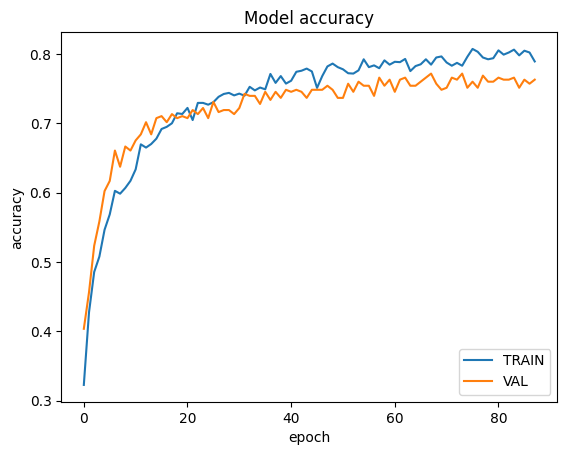

In [22]:
# Visualize the training history to see whether you're overfitting.
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()